Exploratory Data Analysis (EDA) summary

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("Data/Retail_pos_basket_data.csv.csv", parse_dates=["order_date"])

Data Overview

In [4]:
print("Shape:", df.shape)
print("\nColumns:", df.columns.tolist())
print("\nMissing Values:\n", df.isnull().sum())
print("\nUnique Products:", df['product_name'].nunique())
print("Unique Categories:", df['category'].nunique())
print("Unique Customers:", df['user_id'].nunique())

Shape: (10000, 10)

Columns: ['order_id', 'user_id', 'order_date', 'time', 'order_hour_of_day', 'product_name', 'quantity', 'price', 'category', 'product_id']

Missing Values:
 order_id             0
user_id              0
order_date           0
time                 0
order_hour_of_day    0
product_name         0
quantity             0
price                0
category             0
product_id           0
dtype: int64

Unique Products: 68
Unique Categories: 17
Unique Customers: 488


Sales Column

In [5]:
df["sales"] = df["quantity"] * df["price"]

Sales Overview

In [6]:
print("\nTotal Revenue:", df["sales"].sum())
print("Average Basket Size:", df.groupby("order_id")["product_id"].count().mean())


Total Revenue: 5160106.359999999
Average Basket Size: 5.022601707684581


Top Products

In [7]:
top_products = df.groupby("product_name")["sales"].sum().sort_values(ascending=False).head(10)
print("\nTop Products:\n", top_products)


Top Products:
 product_name
Chocolate       92478.01
Soda            89461.60
Shoes           86876.56
Cookies         85253.18
Prawns          85090.57
Energy Drink    84184.32
Tissue          83491.86
Milk            83374.09
Belt            83161.02
Chips           82316.26
Name: sales, dtype: float64


Top Customers

In [8]:
top_customers = df.groupby("user_id")["sales"].sum().sort_values(ascending=False).head(10)
print("\nTop Customers:\n", top_customers)


Top Customers:
 user_id
53     33832.72
329    33783.09
40     30118.58
367    29082.20
234    24915.38
7      24180.48
374    24028.65
273    23941.90
173    23850.25
485    23513.67
Name: sales, dtype: float64


Category-Level Analysis

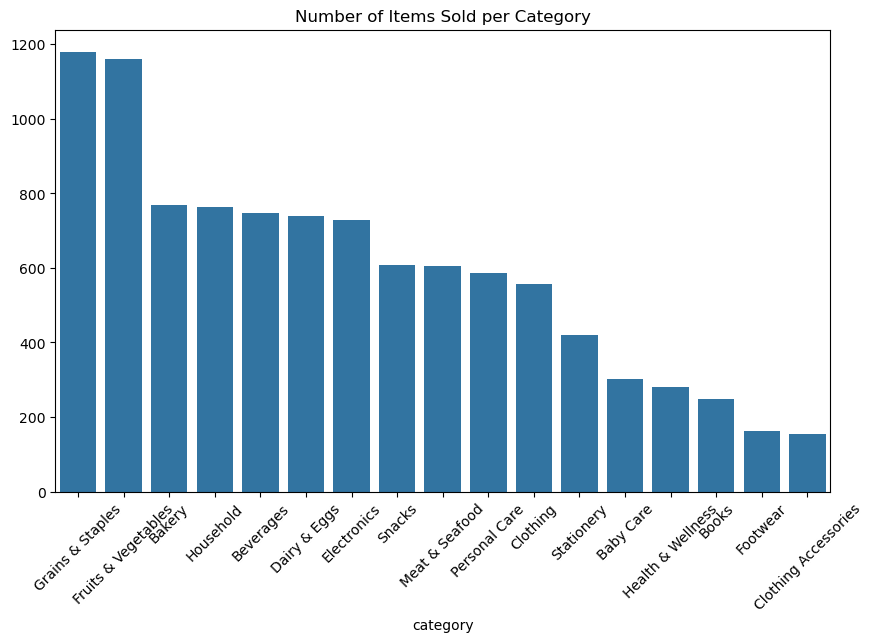

In [9]:
plt.figure(figsize=(10,6))
sns.barplot(x=df["category"].value_counts().index, y=df["category"].value_counts().values)
plt.xticks(rotation=45)
plt.title("Number of Items Sold per Category")
plt.show()

Time-Based Analysis

By Month

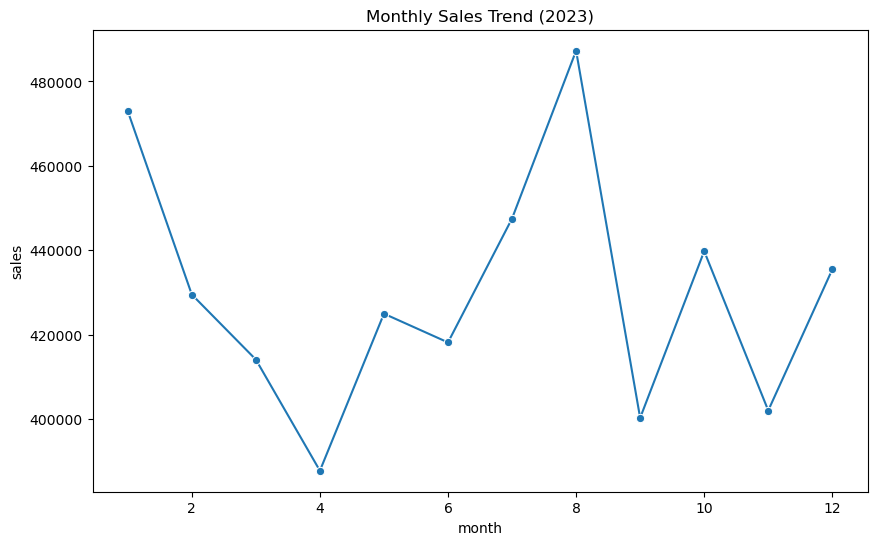

In [10]:
df["month"] = df["order_date"].dt.month
plt.figure(figsize=(10,6))
sns.lineplot(x="month", y="sales", data=df.groupby("month")["sales"].sum().reset_index(), marker="o")
plt.title("Monthly Sales Trend (2023)")
plt.show()

By Hour

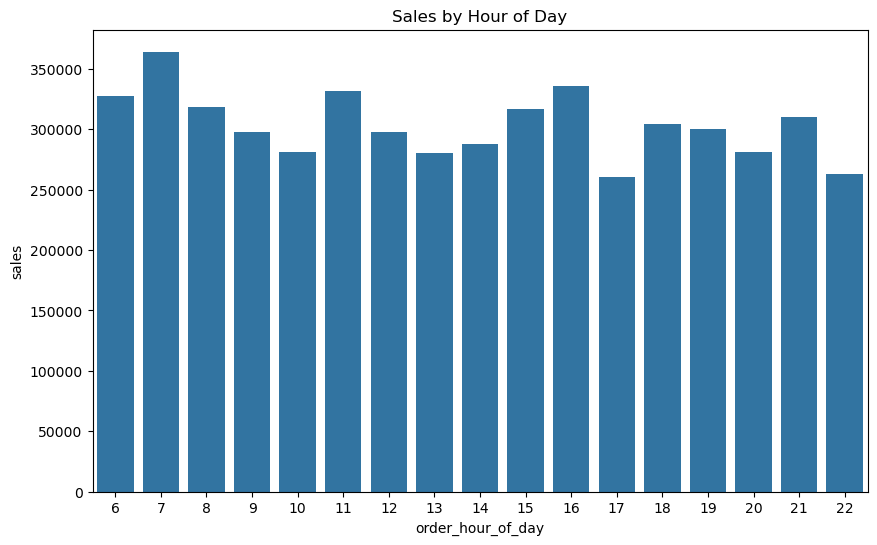

In [11]:
plt.figure(figsize=(10,6))
sns.barplot(x="order_hour_of_day", y="sales", data=df.groupby("order_hour_of_day")["sales"].sum().reset_index())
plt.title("Sales by Hour of Day")
plt.show()


Price & Quantity Distribution

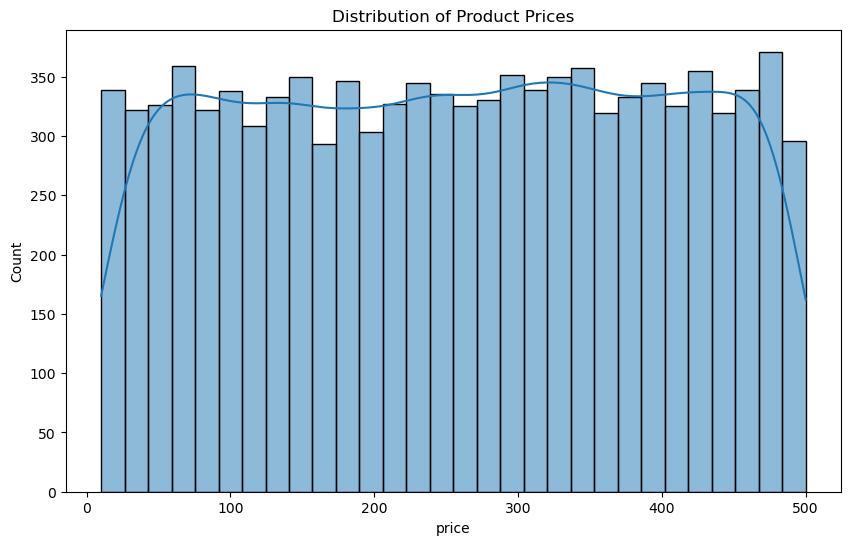

In [12]:
plt.figure(figsize=(10,6))
sns.histplot(df["price"], bins=30, kde=True)
plt.title("Distribution of Product Prices")
plt.show()

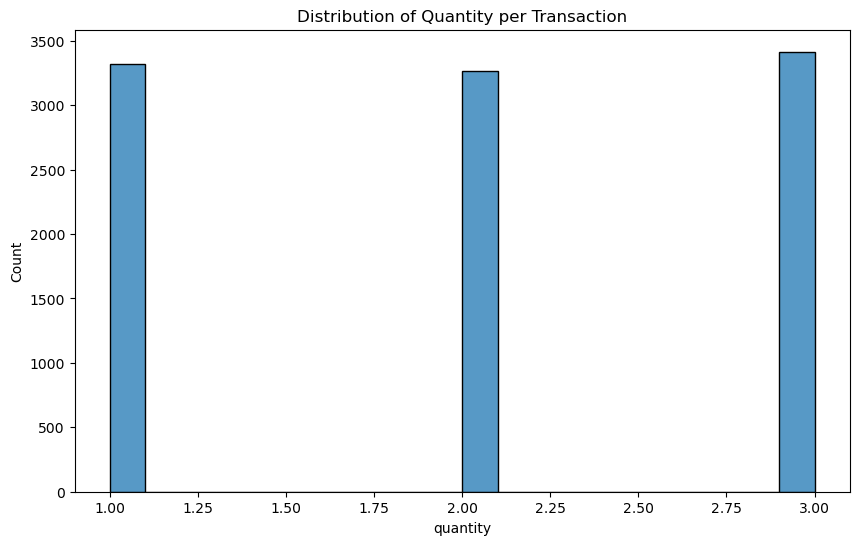

In [13]:

plt.figure(figsize=(10,6))
sns.histplot(df["quantity"], bins=20, kde=False)
plt.title("Distribution of Quantity per Transaction")
plt.show()

Customer Behavior

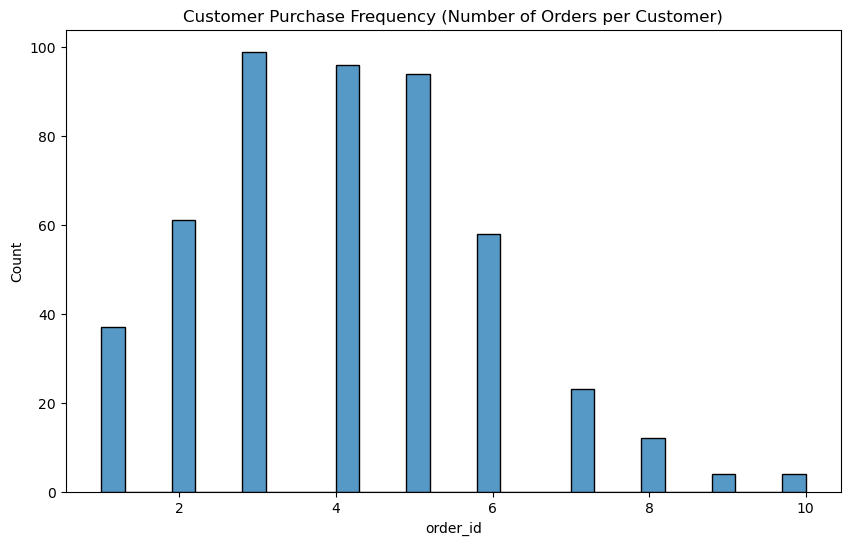

In [14]:
cust_orders = df.groupby("user_id")["order_id"].nunique()
plt.figure(figsize=(10,6))
sns.histplot(cust_orders, bins=30, kde=False)
plt.title("Customer Purchase Frequency (Number of Orders per Customer)")
plt.show()

In [15]:
from itertools import combinations
from collections import Counter

basket_df = df.groupby("order_id")["product_name"].apply(list)
pairs = Counter()

for items in basket_df:
    for combo in combinations(set(items), 2):
        pairs[combo] += 1

print("\nTop Product Pairs (Co-occurrence):")
print(pairs.most_common(10))


Top Product Pairs (Co-occurrence):
[(('Butter', 'Milk'), 19), (('Baby Food', 'Milk'), 18), (('Sugar', 'Energy Drink'), 18), (('Beef', 'Energy Drink'), 17), (('Tomato', 'Energy Drink'), 17), (('Cookies', 'Spices'), 17), (('Baby Food', 'Earphones'), 17), (('Chicken Breast', 'Dishwashing Liquid'), 17), (('Potato', 'Energy Drink'), 17), (('Pastry', 'Dishwashing Liquid'), 16)]
